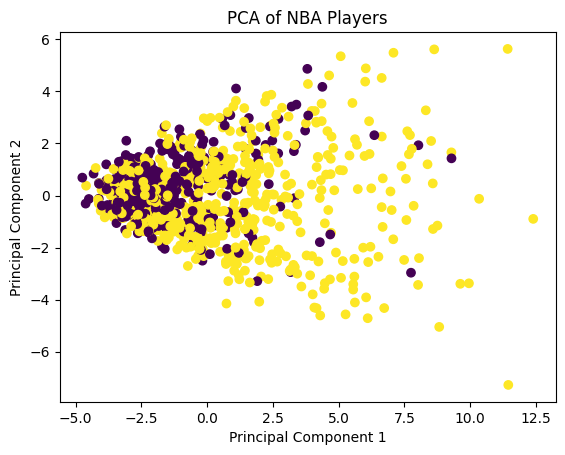

Accuracy: 0.68
Confusion Matrix:
 [[ 82  65]
 [ 60 186]]


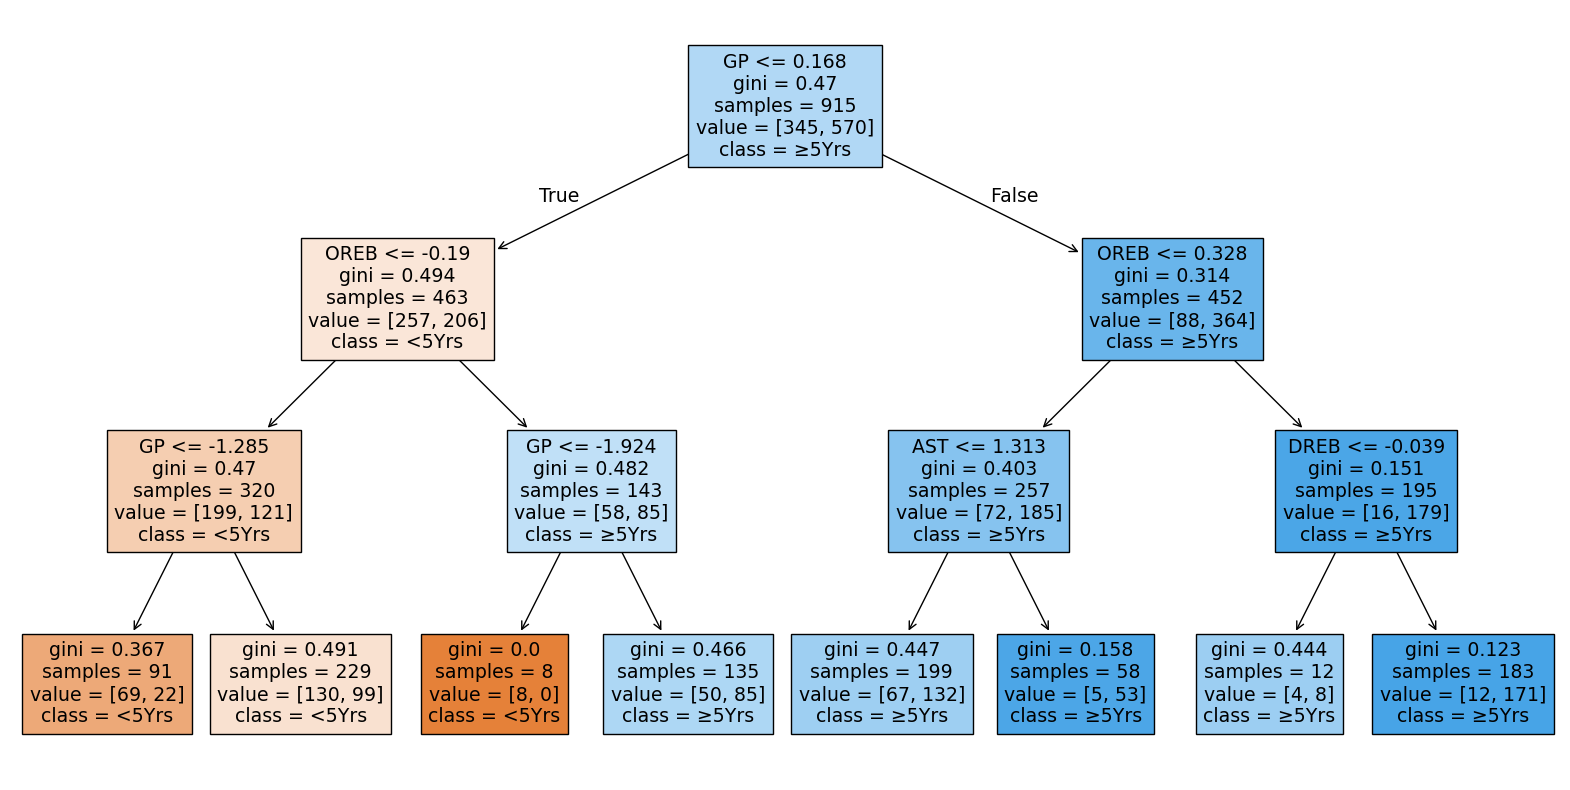

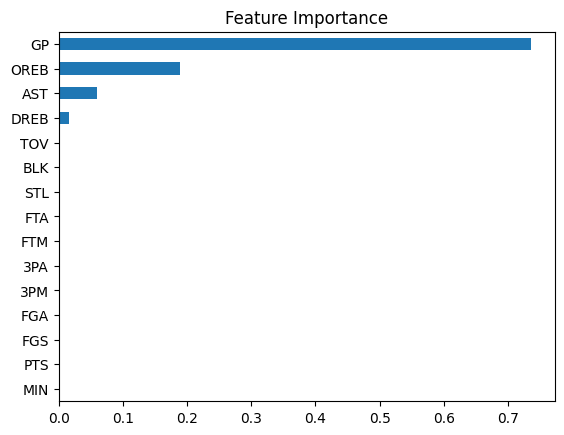

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv('nba_data.csv')

# Preprocessing
df.drop('Name', axis=1, inplace=True)  # Remove identifier
X = df.drop('5Yrs', axis=1)
y = df['5Yrs']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # PCA for performance measurement
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_train_scaled)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of NBA Players')
# plt.show()

# Decision Tree Model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train_scaled, y_train)

# Evaluation
y_pred = clf.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['<5Yrs', '≥5Yrs'], filled=True)
plt.show()

# Feature Importance
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

C:\Users\fsm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\fsm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features: Index(['GP', 'MIN', 'PTS', 'FGS', 'FGA', 'FTA'], dtype='object')
Accuracy with selected features: 0.6870229007633588


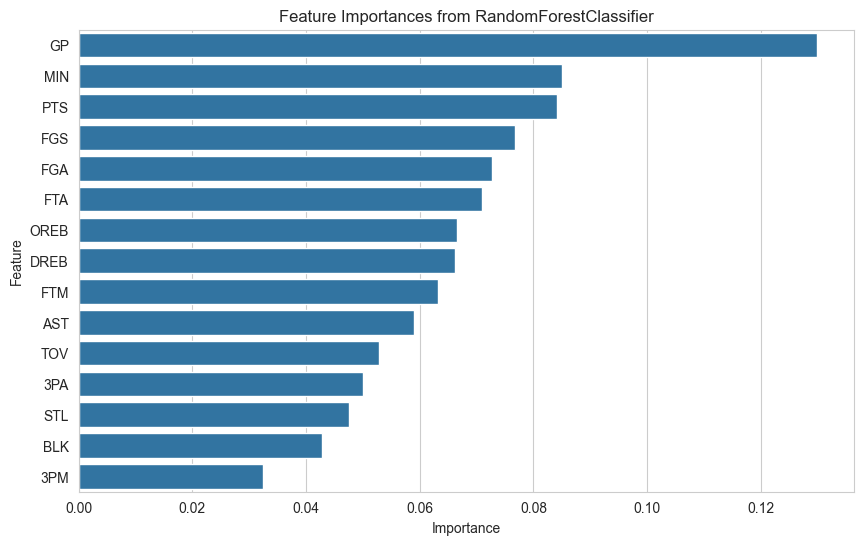

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Set the style for seaborn plots
sns.set_style('whitegrid')

# Set matplotlib to display plots inline
%matplotlib inline

# Load the dataset
df = pd.read_csv('nba_data.csv')

# Drop the Name column
df = df.drop('Name', axis=1)

# Separate features (X) and target variable (y)
X = df.drop('5Yrs', axis=1)
y = df['5Yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Use SelectFromModel to select features
selector = SelectFromModel(rf, prefit=True)

# Transform the feature matrices
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

print('Selected features:', selected_feature_names)

# Create a new RandomForestClassifier with the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with the selected features
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_selected.predict(X_test_selected)

# Calculate the accuracy of the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print('Accuracy with selected features:', accuracy_selected)

# Get feature importances from the original RandomForestClassifier
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()